# Working With Strings In Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Introduction ##

In [2]:
world_dev = pd.read_csv("World_dev.csv")
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged = pd.merge(left = happiness2015, right = world_dev, how = 'left', left_on = 'Country', right_on = 'ShortName')
merged = merged.rename(col_renaming, axis = 1)

## Using Apply to Transform Strings ##

In [3]:
def extract_last_word(element):
    s = str(element)
    s_s = s.split()
    return s_s[-1]

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)
print(merged['Currency Apply'].head)

<bound method NDFrame.head of 0         franc
1         krona
2         krone
3         krone
4        dollar
5          Euro
6          Euro
7         krona
8        dollar
9        dollar
10       shekel
11        colon
12         Euro
13         peso
14       dollar
15         real
16         Euro
17         Euro
18         Euro
19       dirham
20     sterling
21        Omani
22       fuerte
23       dollar
24       balboa
25         Euro
26         peso
27        riyal
28         Euro
29         peso
         ...   
128        kyat
129        lari
130      kwacha
131       rupee
132       franc
133         lev
134       pound
135        rial
136      kwanza
137       franc
138         nan
139       franc
140    shilling
141       franc
142       franc
143       franc
144        riel
145    shilling
146      ariary
147       franc
148       franc
149       franc
150         nan
151       franc
152     afghani
153       franc
154       franc
155         nan
156       franc
157       

## Vectorized String Methods Overview ##

In [4]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
print(merged['Currency Vectorized'].head())

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object


## Exploring Missing Values with Vectorized String Methods ##

In [5]:
lengths = merged['CurrencyUnit'].str.len()
value_counts = lengths.value_counts(dropna = False)

## Finding Specific Words in Strings ##

In [6]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern)
print(national_accounts.head())

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object


## Finding Specific Words in Strings Continued ##

In [7]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern, na = False)
merged_national_accounts = merged[national_accounts]
print(merged_national_accounts.head())

          Country                   Region_x  Happiness Rank  Happiness Score  \
4          Canada              North America               5            7.427   
7          Sweden             Western Europe               8            7.364   
8     New Zealand  Australia and New Zealand               9            7.286   
9       Australia  Australia and New Zealand              10            7.284   
14  United States              North America              15            7.119   

    Standard Error  Economy (GDP per Capita)   Family  \
4          0.03553                   1.32629  1.32261   
7          0.03157                   1.33171  1.28907   
8          0.03371                   1.25018  1.31967   
9          0.04083                   1.33358  1.30923   
14         0.03839                   1.39451  1.24711   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  ...  \
4                    0.90563  0.63297                        0.32957  ...   
7               

## Extracting Substrings from a Series ##

In [8]:
pattern =r"([1-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern)

## Extracting Substrings from a Series Continued ##

In [9]:
pattern = r"([1-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern, expand=True)

## Extracting All Matches of a Pattern from a Series ##

In [10]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
years = merged['IESurvey'].str.extractall(pattern)
value_counts = years['Years'].value_counts()
print(value_counts)

2012    33
2010    28
2011    22
2013    12
2009     8
2005     6
2008     6
2007     4
2004     3
2000     1
1999     1
2006     1
1998     1
2003     1
2002     1
1995     1
1992     1
Name: Years, dtype: int64


## Extracting More Than One Group of Patterns from a Series ##

In [11]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
first_two_year = years['First_Year'].str[0:2]
years['Second_Year'] = first_two_year + years['Second_Year']

## Cleaning a String Column, Aggregate the Data, and Plot the Results ##

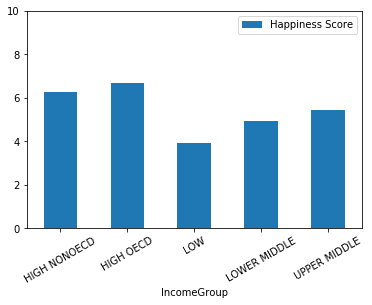

In [12]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()